# imorting libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score    #measures clustering scores
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans   #
from sklearn.preprocessing import StandardScaler


# Ignore warnings
warnings.filterwarnings('ignore')

#Seaborn visualization set up
#%matplotlib inline
sns.set_style('darkgrid')

# data exploring

In [285]:
df=pd.read_csv(r"C:\Users\hmyeh\Downloads\CC GENERAL.csv",delimiter = ',')

In [286]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [288]:
#checking for null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [289]:
#removing null values 
df = df[df['MINIMUM_PAYMENTS'].notna()]
df=df[df['CREDIT_LIMIT'].notna()]

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [291]:
df.duplicated().sum()

0

In [292]:
# counting unique values
(pd.unique(df['TENURE']))
#8629 reapetad values only 7 uniqe

array([12,  8, 11,  9, 10,  6,  7], dtype=int64)

In [293]:
df.drop(['TENURE'],axis=1,inplace=True)
df #droping because Tenure that wont affect clustering

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [294]:
df.drop(['CUST_ID'],axis=1,inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


detectning outliers

In [295]:
def outlier_percent(data):    #detecting the outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [296]:
for column in df.columns:  #detecting the outliers
    data = df[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.71%
Outliers in "BALANCE_FREQUENCY": 17.5%
Outliers in "PURCHASES": 8.89%
Outliers in "ONEOFF_PURCHASES": 11.13%
Outliers in "INSTALLMENTS_PURCHASES": 9.39%
Outliers in "CASH_ADVANCE": 11.31%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.67%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 3.95%
Outliers in "CASH_ADVANCE_TRX": 9.19%
Outliers in "PURCHASES_TRX": 8.29%
Outliers in "CREDIT_LIMIT": 2.81%
Outliers in "PAYMENTS": 9.09%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 15.55%


# preprocessing
1.handling the outliers
2.impute missing data
3.scale the data
4.Reduce dimentions using PCA


first we detect the outliers

In [297]:
for column in df.columns:
    data = df[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    df[column].loc[outliers] = np.nan # instead of removing outliers they will be replaced by their mean
                                      # so we first set them to null then fill the null
df.isna().sum()

BALANCE                              666
BALANCE_FREQUENCY                   1511
PURCHASES                            768
ONEOFF_PURCHASES                     961
INSTALLMENTS_PURCHASES               811
CASH_ADVANCE                         977
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           749
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               341
CASH_ADVANCE_TRX                     794
PURCHASES_TRX                        716
CREDIT_LIMIT                         243
PAYMENTS                             785
MINIMUM_PAYMENTS                     841
PRC_FULL_PAYMENT                    1343
dtype: int64

In [298]:
from sklearn.impute import KNNImputer # by searching i foundout the knnimputer replace the nulls with the mean value of nearest elements in coloumn
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isna().sum()  #making sure all outliers are replaced
df2 =df

then scaling the data

In [299]:

df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,-5.866981e-16,3.342233e-15,-3.207164e-15,-2.734111e-15,7.069380e-16,-5.921811e-16,-2.185028e-16,-9.360841e-15,-2.426601e-15,-5.976384e-16,-4.297197e-16,-1.294600e-15,6.670286e-15,-2.331520e-16,5.062082e-16,-3.180250e-15
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-9.876890e-01,-4.660887e+00,-9.126612e-01,-6.736315e-01,-7.884063e-01,-6.660437e-01,-1.236139e+00,-7.474405e-01,-9.265216e-01,-7.369370e-01,-6.882208e-01,-9.698861e-01,-1.365853e+00,-1.225669e+00,-1.140018e+00,-4.560408e-01
25%,-8.728510e-01,3.444136e-01,-8.499976e-01,-6.736315e-01,-7.884063e-01,-6.660437e-01,-1.028455e+00,-7.474405e-01,-9.265216e-01,-7.369370e-01,-6.882208e-01,-8.790904e-01,-8.687583e-01,-8.145216e-01,-7.566080e-01,-4.560408e-01
50%,-2.785763e-01,3.444136e-01,-3.721724e-01,-5.757235e-01,-4.691253e-01,-6.660437e-01,9.968862e-03,-3.890390e-01,-5.078338e-01,-7.369370e-01,-6.882208e-01,-3.343164e-01,-4.197695e-01,-3.459987e-01,-4.367897e-01,-4.560408e-01
75%,5.637742e-01,3.444136e-01,6.084601e-01,3.675588e-01,5.193683e-01,5.174706e-01,1.048393e+00,5.428098e-01,9.575697e-01,3.234514e-01,4.607504e-01,5.736402e-01,7.027027e-01,6.658274e-01,5.868612e-01,-2.570192e-01
max,2.918069e+00,3.444136e-01,3.139980e+00,3.514091e+00,3.295204e+00,3.150437e+00,1.256077e+00,2.771425e+00,1.585600e+00,3.239511e+00,3.141683e+00,2.934327e+00,2.979718e+00,2.949476e+00,2.962717e+00,4.519524e+00


Dimention Reduction using PCA

In [300]:
#the purpose for dimention reducing is that we make clusters by taking all coloumns in mind 
#but that mean we must deal with multi dimensioned data 
# to reduce data dimension our feature set needs to have features with no co-relation 
#though this features must decribes all the dataset features
#to acheive this we use pca(Principal Component Analysis) 

In [301]:
pca = PCA(n_components=0.9, random_state=42) # dimension reducer algorithim
pca.fit(df)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(df), columns=PC_names)
pca2=pca_data  # save a copy for trying dbscan later

# Train the Model

## Kmeans

Find the number of clusters parameter using the elbow method

In [302]:

K=range(2,12)
wss = []

for k in K:
    kmeans= KMeans(n_clusters=k)
    kmeans=kmeans.fit(df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

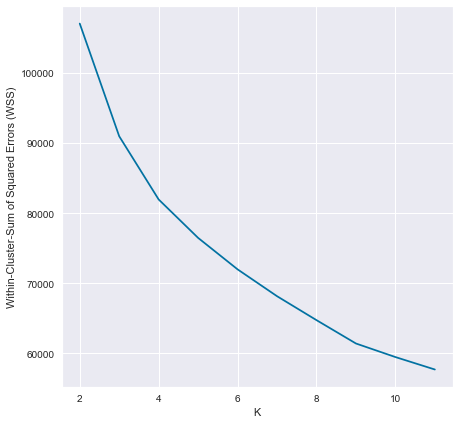

In [303]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)') # looks like 4 is the best choice
plt.plot(K,wss)

In [304]:
kmeans = KMeans(n_clusters=4, init='random', max_iter=300,random_state=42)
labels = kmeans.fit_predict(pca_data)

Now I add these labels to 2 dataframes:
    df (original data)
    pca (dimension reduced data)
    
   df2 is the data without scaling

In [305]:
df['LABELS']=labels

df2['LABELS']=labels
pca_data['LABELS']=labels

Let's see how our data is distributed among these 4 clusters:

<AxesSubplot:ylabel='LABELS'>

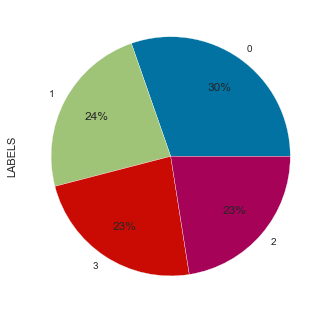

In [306]:
pca_data.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [307]:
def spider_plot(data, title):     # will use it to visualize which feature affects the each class more 
    means = data.groupby("LABELS").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()

In [308]:
#spider_plot(pca_data, 'PCA Data')  # think of it as fifa players rating nearer the line to the edge the higher its val

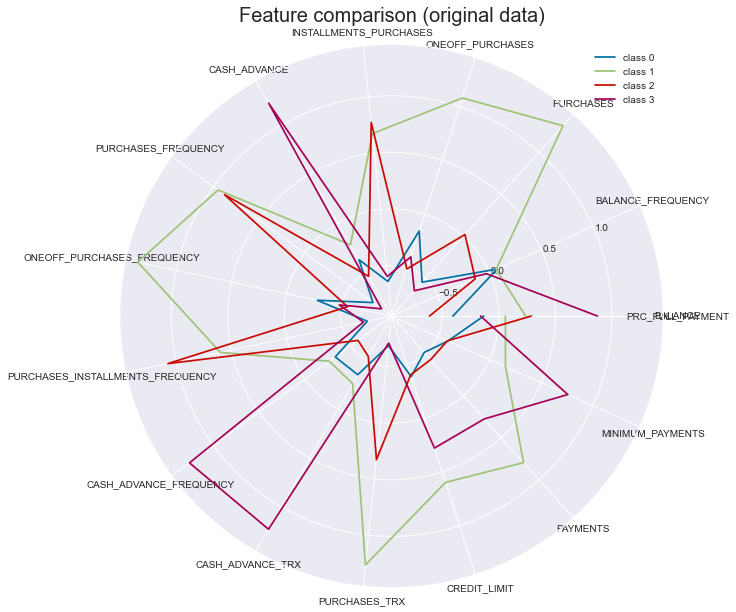

In [309]:
spider_plot(df, 'original data')# think of it as fifa players rating the nearer the line to the edge the higher value it has in this feature

it is little bit hard to read but lets explain it    
lets take the 4 clusters one by one

BALANCE feature is the right most feature on plot


1- RED: we noticed that RED class has the least BALANCE but still high in PURCHASE they are the second highest which means they dont make much money but still tends to spend much they are such "WASTERS" of money they also use INSTALLMENTS as perfect solution for their lack of money but eager to buy state

2- BLUE: they have low BALANCE and also low PURCHASE we can call them "ECONOMICALS" they appreciate the value of every pound 

3-GREEN: they have high BALANCE and they are actually enjoying it look at their PURCHASE it is the highest above all classes they must be the "HIGH CLASS" customers

4-PURPLE: they have the most BALANCE but they doesnt seem to be spending it through credit card they take all money cash from ATMs( look at the CASH_ADVANCE )but actually who needs that amount of money in cash "MYSTERIOUS" right?


so to sum up the clusters we have:

WASTERS: low BALANCE high PURCHASES (red)

ECONOMICALS: low BALANCE low PURCHASES (blue)

HIGH CLASS: high BALANCE high PURCHASES (green)

MYSTERIOUS: high BALANCE low PURCHASES but high CASH ADVANCE (purple)

    

In [310]:
def colorful_scatter(data):   
    LABEL_COLOR_MAP = {0 : 'b',
                       1 : 'g',
                       2 : 'r',
                       3 : 'm'
                       }
    sns.jointplot(data=data, x="BALANCE", y="PURCHASES", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, height=10)

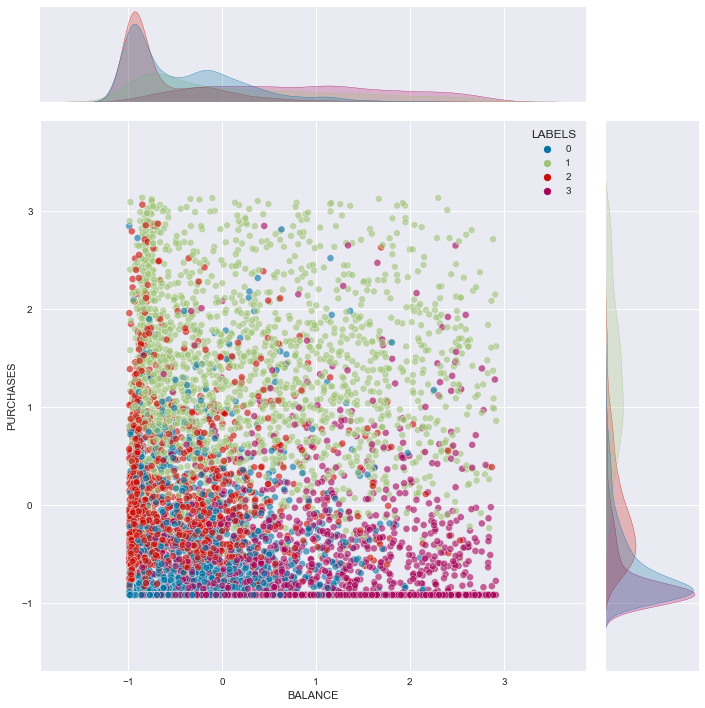

In [311]:
colorful_scatter(df)

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

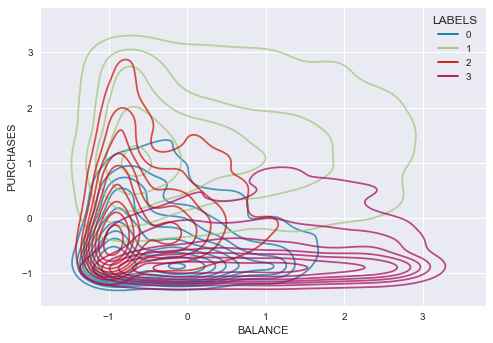

In [312]:
sns.kdeplot(data=df, x="BALANCE", y="PURCHASES", hue="LABELS", palette={0 : 'b', 1 : 'g', 2 : 'r', 3 : 'm'}, alpha=.7, height=20)

It looks like my hypothesis was quite right. in this plot, it is clear that:

people of Class RED "WASTERS" spend a lot while they have low balance.

people of Class BLUE "ECONOMICALS" have a low balance and spend less than others

people of Class GREEN "HIGH CLASS" have high balance and purchase a lot

people of Class PURPLE "MYSTERIOUS" don't purchase much, although they have lots of money

MISTERIOUS,ECONOMICALS have less installments payments that HIGH CLASS and WASTERS are the most 

<AxesSubplot:xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='Density'>

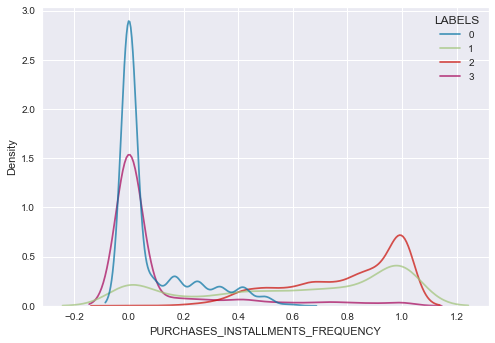

In [313]:
sns.kdeplot(data=df2, x="PURCHASES_INSTALLMENTS_FREQUENCY", hue="LABELS", palette={0 : 'b', 1 : 'g', 2 : 'r', 3 : 'm'}, alpha=.7)

This plot shows how the WASTERS  (red) are trying to buy whatever they want, by buying first and paying later.

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY', ylabel='Density'>

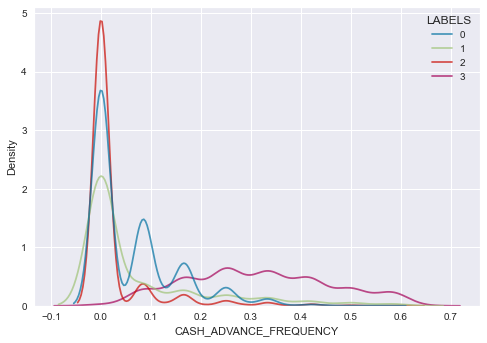

In [314]:
sns.kdeplot(data=df2, x="CASH_ADVANCE_FREQUENCY", hue="LABELS", palette={0 : 'b', 1 : 'g', 2 : 'r', 3 : 'm'}, alpha=.7)

and this plot shows that the MYSTERIOUS are getting cash from ATMs more often than other groups.

now lets see the scores

In [315]:

print(f'Davies-Bouldin index = {davies_bouldin_score(pca_data, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')

Davies-Bouldin index = 1.370246848642776
Silhouette Score = 0.27487930192390897


## DBscan

In [316]:

db = DBSCAN(eps=1.3, min_samples=15).fit(pca2)
dblabels = db.labels_

In [317]:
dbdf= df2 #df2 is original dataframe before scaling
dbdf['LABELS']=dblabels

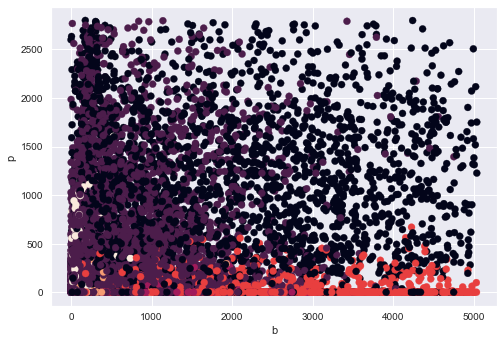

In [318]:
plt.scatter(dbdf['BALANCE'], dbdf['PURCHASES'], c = dblabels, cmap= "rocket") # plotting the clusters
plt.xlabel("b") # X-axis label
plt.ylabel("p ") # Y-axis label
plt.show() # showing the plot




its a little diffrent from the kmeans one and we can see it is harder to read than the Kmeans clusters also

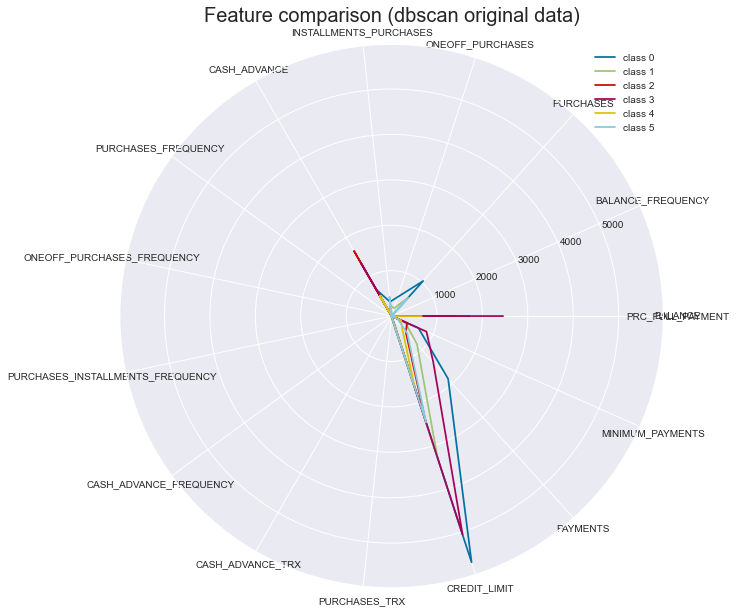

In [319]:
spider_plot(dbdf, 'dbscan original data')  #lets see tha same plot used on kmeans clustering

here we can make sure that that classes doesnt indicate much useful information


In [320]:
print(f'Davies-Bouldin index = {davies_bouldin_score(pca2, dblabels)}')
print(f'Silhouette Score = {silhouette_score(pca2, dblabels)}')

Davies-Bouldin index = 1.7336656842534541
Silhouette Score = -0.010527262100353086


scores also indicates overlapping clusters